[[-1.0856306   0.99734545  0.2829785  ..., -0.90932702  0.47026375
  -1.11143045]
 [-0.74882747  0.56759473  0.71815054 ..., -0.35929672 -1.60969508
   0.01357006]
 [-1.77422355 -1.20137731  1.09625679 ...,  2.04043199  1.01591697
  -1.63378817]
 [-0.45059869  0.60959032  1.17374438 ..., -0.1227329   1.79448602
  -0.32050951]]


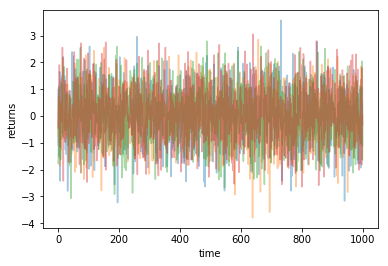

In [22]:
## based on https://blog.quantopian.com/markowitz-portfolio-optimization-2/



%matplotlib inline
import sys
sys.path.append("C:\Program Files (x86)\Python\lib\site-packages\cvxopt")

import numpy as np
import matplotlib.pyplot as plt

from scipy import optimize

#import cvxopt as opt
#from cvxopt import blas, solvers
import pandas as pd

np.random.seed(123)

## Turn off progress printing
#solvers.options['show_progress'] = False

## NUMBER OF ASSETS
n_assets = 4

## NUMBER OF OBSERVATIONS
n_obs = 1000

return_vec = np.random.randn(n_assets, n_obs)
        ## Here we are taking a random normal distribution. We are saying provide us with an array of 4 rows and 1000 columns

print return_vec    
    
plt.plot(return_vec.T, alpha=0.4);         
        ## note that .T tells python to return the transpose of the matrix
        ## note that alpha is a keyword argument that determines the opacity of the line
plt.xlabel('time')
plt.ylabel('returns')


In [17]:
def rand_weights(n):
    ##Produces n random weights that sum to 1
    k = np.random.rand(n)
    return k / sum(k)

print (rand_weights(n_assets))
print (rand_weights(n_assets))
print (rand_weights(n_assets))

[ 0.54066805  0.2360283   0.11660484  0.1066988 ]
[ 0.27638339  0.03006307  0.47850085  0.21505269]
[ 0.1418152   0.32120599  0.15426636  0.38271245]


In [25]:
## note that python definition of row and column in array is reversed
## note how this affects the definitions of the return (mu) and variance-covariance matrix (sigma)

def random_portfolio2d(returns):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio
    '''

    p = np.asmatrix(np.mean(returns, axis=1))
            ## we use function asmatrix() to interpret input object 'returns' as matrix
            ## we are computing the mean along a specified axis.  
            ## The axis = 1 states that the mean should be taken along each row.  Axis = 0 would be along each column.
    w = np.asmatrix(rand_weights(returns.shape[0]))      
            ## note that .shape returns the dimension of the array. for .shape[0] this is a column vector
    C = np.asmatrix(np.cov(returns))
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)

    
    # This recursion reduces outliers to keep plots pretty
    if sigma > 2:
        return random_portfolio2d(returns)
    return mu, sigma

print(return_vec)

print(np.asmatrix(rand_weights(return_vec.shape[0])))

print(random_portfolio2d(return_vec))

[[-1.0856306   0.99734545  0.2829785  ..., -0.90932702  0.47026375
  -1.11143045]
 [-0.74882747  0.56759473  0.71815054 ..., -0.35929672 -1.60969508
   0.01357006]
 [-1.77422355 -1.20137731  1.09625679 ...,  2.04043199  1.01591697
  -1.63378817]
 [-0.45059869  0.60959032  1.17374438 ..., -0.1227329   1.79448602
  -0.32050951]]
[[ 0.1418152   0.32120599  0.15426636  0.38271245]]
(matrix([[ 0.00701419]]), matrix([[ 0.49166997]]))


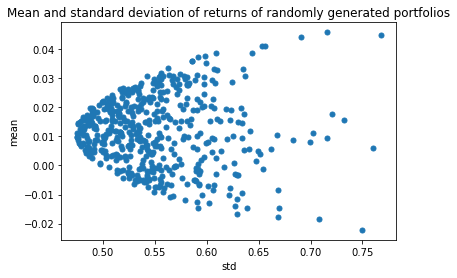

In [9]:
n_portfolios = 500
means, stds = np.column_stack([
    random_portfolio2d(return_vec) 
    for _ in range(n_portfolios)
])

##print (means, stds)

plt.plot(stds, means, 'o', markersize=5)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios')

     pcost       dcost       gap    pres   dres
 0: -5.0267e-03 -1.0500e+00  1e+00  1e-16  3e+00
 1: -7.0118e-03 -5.7796e-02  5e-02  2e-16  1e-01
 2: -2.1272e-02 -3.2067e-02  1e-02  1e-16  2e-17
 3: -2.3343e-02 -2.3817e-02  5e-04  2e-16  2e-17
 4: -2.3609e-02 -2.3614e-02  6e-06  1e-16  1e-17
 5: -2.3612e-02 -2.3612e-02  6e-08  1e-16  2e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.5722e-03 -1.0480e+00  1e+00  2e-16  3e+00
 1: -5.5000e-03 -5.5617e-02  5e-02  8e-17  1e-01
 2: -1.8307e-02 -2.8145e-02  1e-02  2e-16  1e-17
 3: -2.0236e-02 -2.0675e-02  4e-04  1e-16  2e-17
 4: -2.0527e-02 -2.0533e-02  6e-06  1e-16  2e-17
 5: -2.0532e-02 -2.0532e-02  6e-08  1e-16  8e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.9432e-03 -1.0458e+00  1e+00  0e+00  3e+00
 1: -3.8092e-03 -5.3194e-02  5e-02  1e-16  1e-01
 2: -1.5246e-02 -2.4104e-02  9e-03  1e-16  1e-17
 3: -1.7023e-02 -1.7502e-02  5e-04  8e-17  8e-18
 4: -1.7346e-02 -1.7354e

[[  2.77880107e-09]
 [  3.20322848e-06]
 [  1.54301198e-06]
 [  9.99995251e-01]]


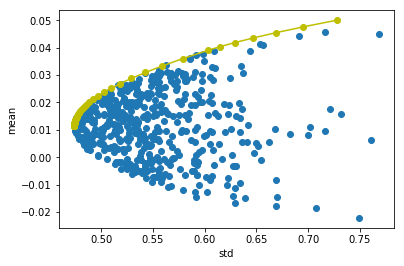

In [14]:
#import sys
#sys.path.append('C:\Python27\Lib\site-packages')

import cvxopt as opt
from cvxopt import blas, solvers    # blas = Basic Linear Algebra Subprograms, solvers is used for convex optimization

def optimal_portfolio(returns):
    n = len(returns)                # use function len() to return the length of object 'returns'
    returns = np.asmatrix(returns)  # use function asmatrix() to interpret input object 'returns' as matrix
    
    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix. 
                                 # eye() returns a 2-D array with ones on the diagonal and zeros elsewhere
    h = opt.matrix(0.0, (n ,1))  # n x 1 matrix of 0s
    A = opt.matrix(1.0, (1, n))  # 1 x n matrix of 1s
    b = opt.matrix(1.0)          # scalar = 1
    
    # Calculate efficient frontier weights using quadratic programming (qp)
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]        # dot() function returns the dot product of two matrices
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

weights, returns, risks = optimal_portfolio(return_vec)

plt.plot(stds, means, 'o')
plt.ylabel('mean')
plt.xlabel('std')
plt.plot(risks, returns, 'y-o')

print (weights)

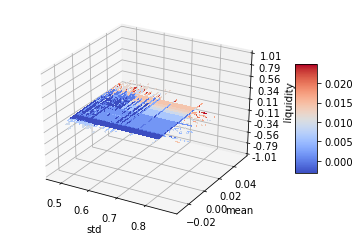

In [49]:
def random_portfolio3d(returns):
    ''' 
    Returns the mean, standard deviation, and liquidity of returns for a random portfolio
    '''

    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))      
    l = np.asmatrix(np.mean(returns, axis=1))
    C = np.asmatrix(np.cov(returns))
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    liq = w * l.T
    
    # This recursion reduces outliers to keep plots pretty
    if sigma > 2:
        return random_portfolio3d(returns)
    return mu, sigma, liq

#print(random_portfolio3d(return_vec))


from mpl_toolkits.mplot3d import Axes3D

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n_portfolios = 500
means, stds, liqs = np.column_stack([
    random_portfolio3d(return_vec) 
    for _ in range(n_portfolios)
])

#print(means, stds)

sstds, mmeans = np.meshgrid(stds, means)
lliqs = liqs

# Plot the surface.
surf = ax.plot_surface(sstds, mmeans, lliqs, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Set labels
ax.set_xlabel('std')
ax.set_ylabel('mean')
ax.set_zlabel('liquidity')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()